![](pic.jpg)

# Day Objective

### K-Nearest Neighbor Classifier

**KNN is a non-parametric and lazy learning algorithm.** 
* **Non-parametric** means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions.
* **Lazy algorithm** means it does not need any training data points for model generation. All training data used in the testing phase. This makes training faster and testing phase slower and costlier. 
* Costly testing phase means time and memory. In the worst case, KNN needs more time to scan all data points and scanning all data points will require more memory for storing training data.


### How does the KNN algorithm work?

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. This is the simplest case. Suppose P1 is the point, for which label needs to predict. First, you find the one closest point to P1 and then the label of the nearest point assigned to P1.

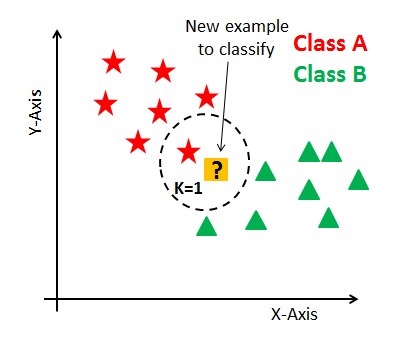

Suppose P1 is the point, for which label needs to be predicted. First, you find the k closest points to P1 and then classify point by majority vote of its k neighbors. Each object votes for their class and the class with the most votes is taken as the prediction. For finding closest similar points, *you find the distance between points using distance* measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. KNN has the following basic steps:
* Calculate distance
* Find closest neighbors
* Vote for labels

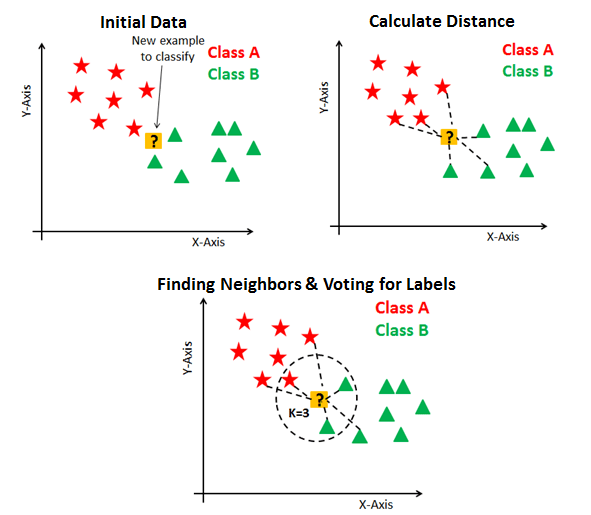



In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv")
df

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M
7,160,64,L
8,163,64,L
9,165,61,L


In [3]:
df.shape

(18, 3)

In [4]:
df["Size"].value_counts()

L    11
M     7
Name: Size, dtype: int64

In [8]:
M = df[df["Size"] == "M"] # data masking
M 

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [9]:
L = df[df["Size"] == "L"] # data masking
L 

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


In [10]:
# or 
g_data = df.groupby("Size")
g_data.get_group("M")

,Height,Weight,Size
0,158,58,M
1,158,59,M
2,158,63,M
3,160,59,M
4,160,60,M
5,163,60,M
6,163,61,M


In [11]:
g_data.get_group("L")

,Height,Weight,Size
7,160,64,L
8,163,64,L
9,165,61,L
10,165,61,L
11,165,62,L
12,168,62,L
13,168,63,L
14,168,66,L
15,170,63,L
16,170,64,L


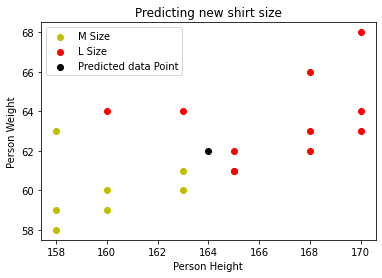

In [35]:
plt.scatter(M["Height"],M["Weight"], c = 'y', label = "M Size") # M size shirts group
plt.scatter(L["Height"],L["Weight"],c = "r", label = "L Size") # L size shirts
plt.scatter(164,62, c = "black", label = "Predicted data Point")  # predicted data point
# black data point may be L size 
plt.xlabel("Person Height")
plt.ylabel("Person Weight")
plt.title("Predicting new shirt size")
plt.legend()
plt.show()

In [19]:
X = df[df.columns[:-1]]
X

,Height,Weight
0,158,58
1,158,59
2,158,63
3,160,59
4,160,60
5,163,60
6,163,61
7,160,64
8,163,64
9,165,61


In [20]:
y = df["Size"]
y

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     L
8     L
9     L
10    L
11    L
12    L
13    L
14    L
15    L
16    L
17    L
Name: Size, dtype: object

In [22]:
# data conversion - categorial type data into numerical data 

# Label Encoder - Preproccessing Technique
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
target = lab.fit_transform(df["Size"])


In [23]:
df["Target"] = target
df

,Height,Weight,Size,Target
0,158,58,M,1
1,158,59,M,1
2,158,63,M,1
3,160,59,M,1
4,160,60,M,1
5,163,60,M,1
6,163,61,M,1
7,160,64,L,0
8,163,64,L,0
9,165,61,L,0


In [25]:
X 
y = df["Target"]
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: Target, dtype: int32

In [26]:
df.shape

(18, 4)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
nb = KNeighborsClassifier(n_neighbors = 5)
nb.fit(X,y)

KNeighborsClassifier()

In [32]:
nb.predict([[164,62]]) # 17-568pin person Shirt size is L 

array([0])

In [ ]:
L = 0 
M = 1


### Eager Vs. Lazy Learners
Eager learners mean when given training points will construct a generalized model before performing prediction on given new points to classify. You can think of such learners as being ready, active and eager to classify unobserved data points.
Lazy Learning means there is no need for learning or training of the model and all of the data points used at the time of prediction. Lazy learners wait until the last minute before classifying any data point. Lazy learner stores merely the training dataset and waits until classification needs to perform. Only when it sees the test tuple does it perform generalization to classify the tuple based on its similarity to the stored training tuples. Unlike eager learning methods, lazy learners do less work in the training phase and more work in the testing phase to make a classification. Lazy learners are also known as instance-based learners because lazy learners store the training points or instances, and all learning is based on instances.

### Curse of Dimensionality
KNN performs better with a lower number of features than a large number of features. You can say that when the number of features increases than it requires more data. Increase in dimension also leads to the problem of overfitting. To avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions. This problem of higher dimension is known as the Curse of Dimensionality.
To deal with the problem of the curse of dimensionality, you need to perform principal component analysis before applying any machine learning algorithm, or you can also use feature selection approach. Research has shown that in large dimensions, Euclidean distance is not useful anymore. Therefore, you can prefer other measures such as cosine similarity, which get decidedly less affected by high dimension.

Lazy Learner
- Less time to learn - taking very less time to training, faster in training period only- it occupies more momery to store all data points, slower to testing period


eager Learner 
- takes more time to train, very less time to test - it occupies less memory, faster 

### How do you decide the number of neighbors in KNN?
Now, you understand the KNN algorithm working mechanism. At this point, the question arises that 
* How to choose the optimal number of neighbors? 
* And what are its effects on the classifier? 

The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.
Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance. You can also try Elbow method here.

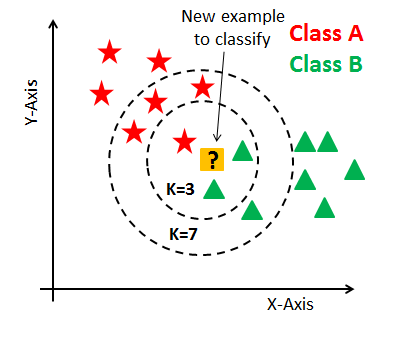

[Shirts](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/shirt.csv)

[Companies](https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/1000_Companies.csv)

Example:

fruits classification

1. red in color, circle shape, 50gm - 100gm     --  apple
2. orange in color, circle shape, 150gm - 300gm -- orange

to predict
3. red in color, shape, 75gm 

In [37]:
X
y

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
Name: Target, dtype: int32

In [52]:
# calculate the accuracy of different neighbors , 1, 3, 5, 7
from sklearn.metrics import accuracy_score
l = []
for i in range(1,10,2):
    nb = KNeighborsClassifier(n_neighbors=i)
    nb.fit(X,y)
    y_pred = nb.predict(X)
    l.append(accuracy_score(y,y_pred)*100)

In [63]:
c = 1
for i in range(1,len(l)):
    print(c, "neighbors accuarcy  is ",l[i])
    c += 2

1 neighbors accuarcy  is  100.0
3 neighbors accuarcy  is  83.33333333333334
5 neighbors accuarcy  is  88.88888888888889
7 neighbors accuarcy  is  83.33333333333334


## KNN - Regression

In [64]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Regression/1000_Companies.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [65]:
data.shape

(1000, 5)

In [66]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [71]:
data = data.drop("State", axis = 1) # axis 1 -- columns, axis 0 -- rows

In [72]:
data

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.800,471784.1000,192261.83000
1,162597.70,151377.590,443898.5300,191792.06000
2,153441.51,101145.550,407934.5400,191050.39000
3,144372.41,118671.850,383199.6200,182901.99000
4,142107.34,91391.770,366168.4200,166187.94000
...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251
996,134970.00,130390.080,329204.0228,164336.60550
997,100275.47,241926.310,227142.8200,413956.48000
998,128456.23,321652.140,281692.3200,333962.19000


In [74]:
X = data.drop("Profit", axis = 1)
X

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.800,471784.1000
1,162597.70,151377.590,443898.5300
2,153441.51,101145.550,407934.5400
3,144372.41,118671.850,383199.6200
4,142107.34,91391.770,366168.4200
...,...,...,...
995,54135.00,118451.999,173232.6695
996,134970.00,130390.080,329204.0228
997,100275.47,241926.310,227142.8200
998,128456.23,321652.140,281692.3200


In [76]:
y = data["Profit"]
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [96]:
from sklearn.neighbors import KNeighborsRegressor

In [97]:
nbr = KNeighborsRegressor(n_neighbors=5)

In [98]:
nbr.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [99]:
y_pred = nbr.predict(x_test)

In [94]:
nbr.score(x_test,y_pred)* 100

100.0

In [84]:
y_test.shape

(300,)

In [85]:
y_pred.shape

(300,)

In [102]:
nbr.predict([[159026.0,133942.7797,375620.1405]])

array([184933.91215])

In [100]:
x_test[:1]

,R&D Spend,Administration,Marketing Spend
477,159026.0,133942.7797,375620.1405


In [101]:
y_test[:1]

477    184887.4387
Name: Profit, dtype: float64

In [104]:
li = []
for i in range(1,11):
    nbr = KNeighborsRegressor(n_neighbors=i)
    nbr.fit(x_train,y_train)
    y_pred = nbr.predict(x_test)
    li.append(nbr.score(x_test,y_pred))

In [105]:
li

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

if the training time is more and also training data points more you will get better accuracy/result

# Multi class classification using KNN classifiee

In [107]:
# 2 features are height and weight 
# 2 classes = M, L 

# 2 or more number of features
# more than 2  number of classes/ targets/ labels

In [108]:
from sklearn.datasets import load_iris

In [110]:
data = load_iris()
data
# flowers classfication datasets

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [112]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [114]:
iris = pd.DataFrame(data.data)
iris.columns = data.feature_names
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [115]:
iris["Target"] = data.target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [116]:
iris["Target"].value_counts()

2    50
1    50
0    50
Name: Target, dtype: int64

In [117]:
iris.shape

(150, 5)

In [118]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [119]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [120]:
X = iris.drop("Target",axis = 1) # features 
y = iris["Target"] # target/ class

In [121]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3)


In [122]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [125]:
model.predict([[4.5,4,6.5,2.5]])

array([2])

In [123]:
iris.min()

sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
Target               0.0
dtype: float64

In [124]:
iris.max()

sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
Target               2.0
dtype: float64

In [128]:
x_train[100:101] # 100th record 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
82,5.8,2.7,3.9,1.2


In [129]:
y_train.iloc[100]

1

In [130]:
model.predict([[5.8,2.7,3.9,1.2]])

array([1])

In [131]:
y_pred = model.predict(x_test)

In [133]:
accuracy_score(y_test,y_pred)*100

95.55555555555556